In [1]:
import os
import cv2
import random
import numpy as np
from glob import glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
def charbonnier_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred) + tf.square(1e-3)))


def peak_signal_noise_ratio(y_true, y_pred):
    return tf.image.psnr(y_pred, y_true, max_val=255.0)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
model = tf.keras.models.load_model('./drive/MyDrive/Models/MIRNet.h5', custom_objects={'charbonnier_loss':                   
charbonnier_loss, "peak_signal_noise_ratio":peak_signal_noise_ratio})

# Check its architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

In [9]:
def plot_results(images, titles, figure_size=(12, 12)):
    fig = plt.figure(figsize=figure_size)
    for i in range(len(images)):
        fig.add_subplot(1, len(images), i + 1).set_title(titles[i])
        _ = plt.imshow(images[i])
        plt.axis("off")
    plt.show()


def infer(original_image):
    image = keras.preprocessing.image.img_to_array(original_image)
    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)
    output = model.predict(image)
    output_image = output[0] * 255.0
    output_image = output_image.clip(0, 255)
    output_image = output_image.reshape(
        (np.shape(output_image)[0], np.shape(output_image)[1], 3)
    )
    output_image = Image.fromarray(np.uint8(output_image))
    original_image = Image.fromarray(np.uint8(original_image))
    return output_image


In [10]:
!wget https://www.myclickmagazine.com/wp-content/uploads/2017/11/How-to-take-pictures-in-low-light-inside-your-home-by-Celeste-Pavlik-10.jpg

--2022-10-14 18:07:43--  https://www.myclickmagazine.com/wp-content/uploads/2017/11/How-to-take-pictures-in-low-light-inside-your-home-by-Celeste-Pavlik-10.jpg
Resolving www.myclickmagazine.com (www.myclickmagazine.com)... 107.155.77.186
Connecting to www.myclickmagazine.com (www.myclickmagazine.com)|107.155.77.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325618 (318K) [image/jpeg]
Saving to: ‘How-to-take-pictures-in-low-light-inside-your-home-by-Celeste-Pavlik-10.jpg’

How-to-take-picture 100%[===================>] 317.99K   379KB/s    in 0.8s    

2022-10-14 18:07:45 (379 KB/s) - ‘How-to-take-pictures-in-low-light-inside-your-home-by-Celeste-Pavlik-10.jpg’ saved [325618/325618]



In [11]:
original_image = Image.open("How-to-take-pictures-in-low-light-inside-your-home-by-Celeste-Pavlik-10.jpg")

In [12]:
original_image = original_image.resize((256,256),Image.NEAREST) 

In [13]:
enhanced_image = infer(original_image)

1/1 [==============================] - 13s 13s/step


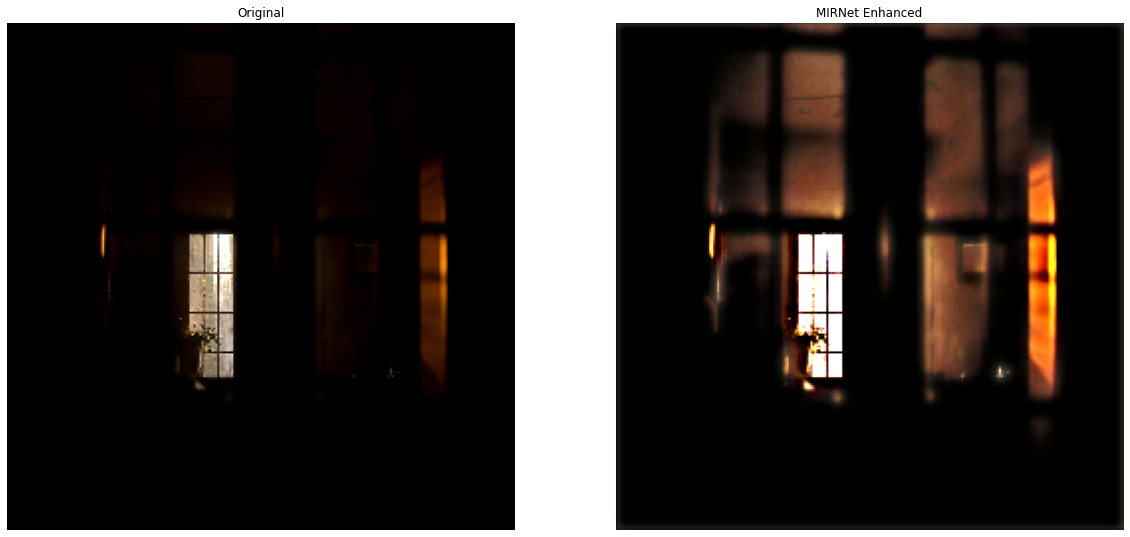

In [14]:
plot_results(
        [original_image, enhanced_image],
        ["Original", "MIRNet Enhanced"],
        (20, 12),
    )